In [ ]:
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [28]:
data = files.upload()

pedidos = pd.read_csv(list(data.keys())[0])

colunas_para_remover = ['hash_id', 'ano', 'data_atualizacao']
pedidos = pedidos.drop(columns=colunas_para_remover)

display(pedidos)

Saving Movimentacoes_2023_12_19.csv to Movimentacoes_2023_12_19 (2).csv


,id_planta,id_depositante,depositante,data_registro,cod_evento,ordem_track,evento,data_evento,programa,data_previsao_expedicao,cod_cliente,cliente,pedido_wms,pedido_cliente,data_emissao,qtde_itens,qtde_pecas,linhas,prioridade,status
0,PRSMS,34776007000898,SIEMENS INFRAESTRUTURA E INDUSTRIA LTDA,2023-11-14 06:21:14,8,10,SAIDA EFETIVA DO CAMINHAO,2023-11-16 19:57:07,8570576.0,2023-11-16 00:00:00,12218713000296,GREYLOGIX BRASIL MAQUINAS LTDA.,30836878,6008694103,2023-11-14 00:00:00,4,12,4.0,1-BAIXA,no prazo
1,PRSMS,34776007000898,SIEMENS INFRAESTRUTURA E INDUSTRIA LTDA,2023-11-09 13:02:43,8,10,SAIDA EFETIVA DO CAMINHAO,2023-11-10 21:19:59,8555484.0,2023-11-10 00:00:00,36378592000127,COMPILE SYSTEMS AUTOMACAO,30774839,6008689204,2023-11-09 00:00:00,2,2,2.0,1-BAIXA,no prazo
2,PRSMS,34776007000898,SIEMENS INFRAESTRUTURA E INDUSTRIA LTDA,2023-11-14 09:25:37,8,10,SAIDA EFETIVA DO CAMINHAO,2023-11-16 21:37:04,8571904.0,2023-11-16 00:00:00,46992210000104,ARNEG BRASIL LTDA.,30838456,6008692459,2023-11-13 00:00:00,2,5,2.0,1-BAIXA,no prazo
3,PRSMS,34776007000898,SIEMENS INFRAESTRUTURA E INDUSTRIA LTDA,2023-11-14 09:25:30,8,10,SAIDA EFETIVA DO CAMINHAO,2023-11-16 21:37:04,8571904.0,2023-11-16 00:00:00,34128906000108,ALTHERIA MANUTENCAO E REPARACOES,30838439,6008692393,2023-11-13 00:00:00,1,5,1.0,1-BAIXA,no prazo
4,PRSMS,34776007000898,SIEMENS INFRAESTRUTURA E INDUSTRIA LTDA,2023-11-10 06:18:33,8,10,SAIDA EFETIVA DO CAMINHAO,2023-11-13 20:33:06,8557082.0,2023-11-13 00:00:00,24366725000166,ENGEMASE ENGENHARIA LTDA.,30787796,6008690309,2023-11-10 00:00:00,14,104,14.0,1-BAIXA,no prazo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,PRSMS,34776007000898,SIEMENS INFRAESTRUTURA E INDUSTRIA LTDA,2023-12-18 05:38:31,6,8,EM FATURAMENTO,2023-12-19 01:01:10,8690297.0,2023-12-19 00:00:00,24091604000159,LM AUTOMACAO EIRELI,31530486,6008733602,2023-12-18 00:00:00,8,39,8.0,1-BAIXA,no prazo
9809,PRSMS,34776007000898,SIEMENS INFRAESTRUTURA E INDUSTRIA LTDA,2023-12-18 05:39:01,6,8,EM FATURAMENTO,2023-12-19 00:08:41,8690297.0,2023-12-19 00:00:00,11898157000100,ALCIONE COGO - ME.,31530564,6008733699,2023-12-18 00:00:00,10,268,10.0,1-BAIXA,no prazo
9810,PRSMS,34776007000898,SIEMENS INFRAESTRUTURA E INDUSTRIA LTDA,2023-12-18 17:13:11,6,8,EM FATURAMENTO,2023-12-18 23:31:53,8695184.0,2023-12-19 00:00:00,33297657000200,CAMPO LARGO MATERIAIS,31545868,6008734775,2023-12-18 00:00:00,21,250,21.0,1-BAIXA,no prazo
9811,PRSMS,34776007000898,SIEMENS INFRAESTRUTURA E INDUSTRIA LTDA,2023-12-18 12:29:50,6,8,EM FATURAMENTO,2023-12-19 01:49:46,8693892.0,2023-12-19 00:00:00,77739290000114,PATOESTE ELETRO INST. LTDA.,31536984,6008734029,2023-12-18 00:00:00,1,1,1.0,1-BAIXA,no prazo


In [29]:
# Lista de colunas a serem codificadas usando 'factorize'
columns_to_factorize = [
    'id_planta', 'id_depositante', 'depositante', 'data_registro', 'cod_evento', 'ordem_track',
    'evento', 'data_evento', 'programa', 'data_previsao_expedicao', 'cod_cliente',
    'cliente', 'pedido_wms', 'pedido_cliente', 'data_emissao', 'qtde_itens',
    'qtde_pecas', 'linhas', 'prioridade', 'status'
]

# Loop para aplicar 'factorize' em cada coluna
for column in columns_to_factorize:
    pedidos[column], _ = pedidos[column].factorize()

# Separar as features (características) e o target (rótulo)
features = pedidos.drop(['status'], axis=1)
target = pedidos['status']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [30]:
# modelo XGBoost
model = XGBClassifier()

model.fit(X_train, y_train)

#  previsões
predictions = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

# Imprimir o relatório de classificação, que inclui precision, recall, f1-score e outras métricas
print('Relatório de Classificação:')
print(classification_report(y_test, predictions))

Acurácia do modelo: 99.08%
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       422
           1       0.99      0.99      0.99      1451
           2       1.00      1.00      1.00        90

    accuracy                           0.99      1963
   macro avg       0.99      0.99      0.99      1963
weighted avg       0.99      0.99      0.99      1963



<Figure size 1000x600 with 0 Axes>

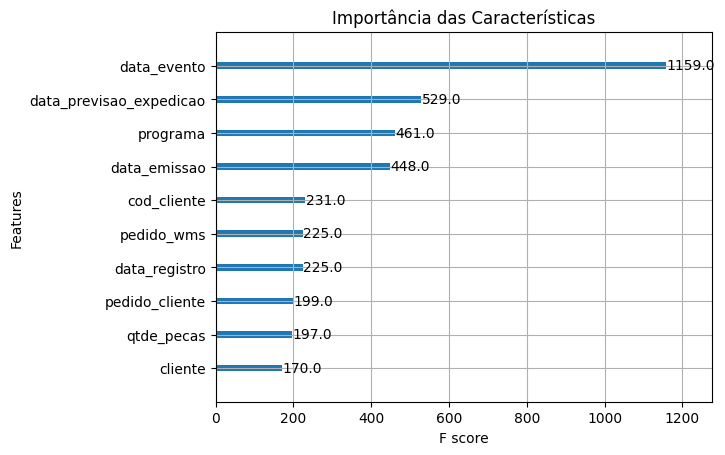

<Figure size 2000x1000 with 0 Axes>

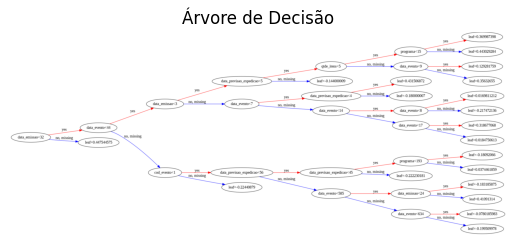

In [31]:
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree

# Supondo que você já treinou seu modelo (model) e tem suas features (features)

# Plotar a importância das características
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='weight', max_num_features=10)  # Pode ajustar o número máximo de características
plt.title('Importância das Características')
plt.show()

# Plotar uma árvore de decisão (substitua index pelo índice da árvore desejada)
plt.figure(figsize=(20, 10))
plot_tree(model, num_trees=0, rankdir='LR')  # Pode ajustar o número da árvore
plt.title('Árvore de Decisão')
plt.show()

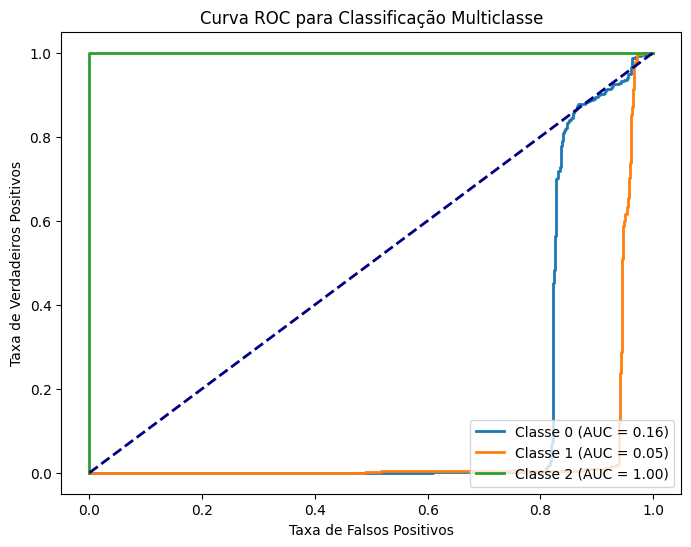

In [35]:
from sklearn.preprocessing import label_binarize

# Binarizar as saídas (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=pd.unique(y_test))

# Treinar o modelo usando predict_proba
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)

# Calcular a curva ROC e a área sob a curva (AUC) para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(pd.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar as curvas ROC para cada classe
plt.figure(figsize=(8, 6))
for i in range(len(pd.unique(y_test))):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Classificação Multiclasse')
plt.legend(loc='lower right')
plt.show()


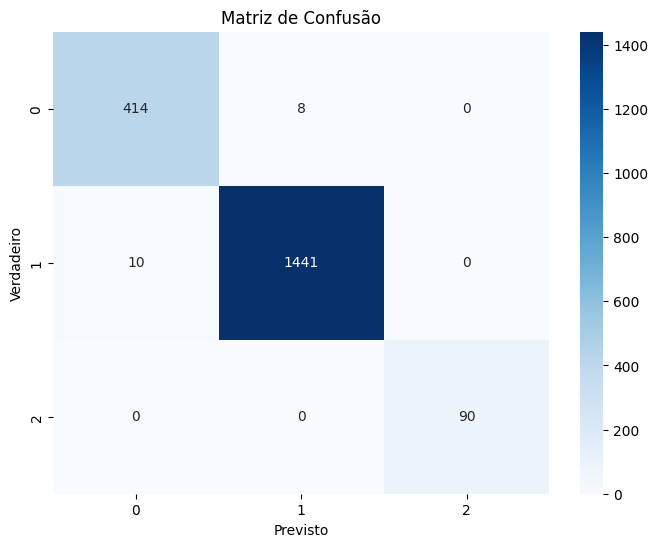

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, predictions)

# Criar um heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()